# T09: Resampling
## Paola Figueroa Álvarez
### 24/nov/2025


In [1]:
import numpy as np
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.linear_model import Ridge, ElasticNet, Lasso, LinearRegression, LogisticRegression
from sklearn.model_selection import LeaveOneOut, train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn import datasets
from sklearn.compose import ColumnTransformer
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from skopt import gp_minimize
from sklearn.metrics import roc_auc_score
from scipy.stats import norm
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier

# Pregunta 1

Using basic statistical properties of the variance, as well as singlevariable calculus, derive (5.6). In other words, prove that α given by
(5.6) does indeed minimize Var(αX + (1 − α)Y ).


$$
\alpha = \frac{\sigma_{Y}^{2} - \sigma_{XY}}{\sigma_{X}^{2} + \sigma_{Y}^{2} - 2\sigma_{XY}}
$$ 
#### Esto me tiene que salir

$$
Var[\alpha X + (1-\alpha)Y] 
= \alpha^{2}Var[X] + (1-\alpha)^{2}Var[Y] + 2\alpha(1-\alpha)Cov[X,Y]
$$

1. Sustituimos por sigma:
$$
Var[\alpha X + (1-\alpha)Y] 
= \alpha^{2}\sigma_X^{2} + (1-\alpha)^{2}\sigma_Y^{2} + 2\alpha(1-\alpha)\sigma_{XY}
$$

2. Derivamos respecto a alpha: 
$$
\frac{dVar}{d\alpha} 
= 2\alpha\sigma_X^{2} - 2(1-\alpha)\sigma_Y^{2} + 2(1-2\alpha)\sigma_{XY}
$$

3. Igualamos a 0
$$
\alpha\sigma_X^{2} - (1-\alpha)\sigma_Y^{2} + (1-2\alpha)\sigma_{XY} = 0
$$

4. Agrupamos términos semejantes
$$
\alpha(\sigma_X^{2} + \sigma_Y^{2} - 2\sigma_{XY}) 
= \sigma_Y^{2} - \sigma_{XY}
$$

Reusltado:
$$
\alpha = \frac{\sigma_Y^{2} - \sigma_{XY}}
{\sigma_X^{2} + \sigma_Y^{2} - 2\sigma_{XY}}
$$

Como podemos ver, el valor de alpha es óptimo porque se obtiene de igualar a cero la derivada de la función de varianza, lo cual identifica puntos críticos. Como habíamos visto en clase respecto a las funciones convexas, em teoría, el punto donde la derivada es cero sería el único mínimo global, por lo que el alpha que se obtiene genera la combinación de activos con menor riesgo.

# Prgeunta 2

We will now derive the probability that a given observation is part of a bootstrap sample. Suppose that we obtain a bootstrap sample
from a set of n observations.
- (a)  What is the probability that the first bootstrap observation is not the jth observation from the original sample? Justify your
answer.
- (b) What is the probability that the second bootstrap observation is not the jth observation from the original sample?
- (c) Argue that the probability that the jth observation is not in the bootstrap sample is (1 − 1/n)n.
- (d) When n = 5, what is the probability that the jth observation is
in the bootstrap sample?
- (e) When n = 100, what is the probability that the jth observation is in the bootstrap sample?
- (f) When n = 10, 000, what is the probability that the jth observation is in the bootstrap sample?
- (g) Create a plot that displays, for each integer value of n from 1 to 100, 000, the probability that the jth observation is in the
bootstrap sample. Comment on what you observe.
- (h) We will now investigate numerically the probability that a bootstrap sample of size n = 100 contains the jth observation. Here j = 4. We first create an array store with values that will subsequently be overwritten using the function np.empty(). We then np.empty() repeatedly create bootstrap samples, and each time we record whether or not the fifth observation is contained in the bootstrap sample.

### a)
si la probabilidad de p(j) es 1/n, entones
$$
p(\text{no obs } j) = 1 - \frac{1}{n}
$$

Como el muestreo es con reemplazo,  el resultado del primer sorteo es independiente del segundo. Entonces, cada sorteo se realiza a partir de la "pobalción" completa con n observaciones


### b)
Para la b pasa lo mismo: 
$$
1 - \frac{1}{n}
$$
Porque la muestra original tiene n observaciones en total, entonces, al realizar el primer sorteo, este es "uniforme", por lo que la probabilidad de seleccionar una observación específica de j es de $1/n$; le restamos el uno porque es la probabilidad de que ocurra el evento contrario.

### c) 
si volvemos a hacer el sorteo, es decir dos consecutivas, sería: 
$$
\left(1 - \frac{1}{n}\right)^2
$$
Para n veces, la fórmula quedaría de la siguiente manera: 
$$
\left(1 - \frac{1}{n}\right)^n
$$
Por lo tanto, la probabilidad de que sí aparezca, es decir, el complemento, sería:
$$
P(\text{complemento}) = 
1 - \left(1 - \frac{1}{n}\right)^n
$$

#### d) Para n= 5
$$
P(\text{n=5}) = 
1 - \left(1 - \frac{1}{5}\right)^5
$$
$$ P(\text{n=5}) = 0.672$$

#### e) Para n= 100
$$
P(\text{n=5}) = 
1 - \left(1 - \frac{1}{100}\right)^100
$$
$$ P(\text{n=5}) = 0.634$$

#### f) Para n= 10,000
$$
P(\text{n=5}) = 
1 - \left(1 - \frac{1}{10000}\right)^10000
$$
$$ P(\text{n=5}) = 0.632$$

#### g)

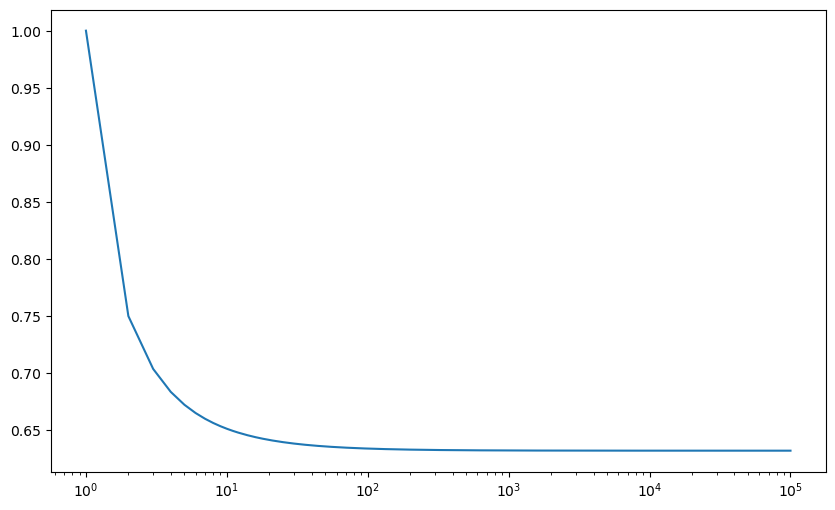

In [2]:
valores = np.arange(1, 100001)

proba = 1 - (1 - 1.0/valores)**valores

plt.figure(figsize=(10, 6))
plt.plot(valores, proba)
plt.xscale('log')
plt.show()

Aquí estamos viendo lo mismo que en los resultados hechos con caluladora: se está formando una asíntota cerca de los valores de 0.65

### h)

In [3]:
random = np.random.default_rng(10)
guardar= np.empty(10000)
for i in range(10000):
    guardar[i] = np.sum(random.choice(100, size=100, replace=True) == 4) > 0
np.mean(guardar)

0.6362

Para poder "forzar" a que j=4 y estuviera en el sample, usé un size=100. lo que significa que se están sacando 100 valores ahí mismo. 

# Pregunta 3

- (a) Explain how k-fold cross-validation is implemented.
- (b) What are the advantages and disadvantages of k-fold crossvalidation relative to:
- - i. The validation set approach?
- - ii. LOOCV?

A) 
A diferencia del train-test, el Kfolds divide en diferentes pliegos (k partes) todo el dataset, de manera que el modelo se entrena haciendo iteraciones de k-1 (si tienes 10, entrenas con la parte nueve, luego la 8....). De esta manera, todos los datos están tanto en el train como en el test pero nunca al mismo tiempo. 

b) 
- i) Comparación con train–test: Su principal ventaja es que permite aprovechar todo el conjunto de datos sin aumentar el riesgo de overfitting, ya que cada observación sirve como validación en algún punto. No obstante, es más pesado y tarda más, ya que el modelo debe entrenarse y probarse varias veces. 
Comparándolo con el LOOCV, este método es mucho más eficiente porque hace menos iteraciones, pero por lo mismo, usa menos datos para entrenar cada iteración, lo que significa que no se usa completamente todos los datos. 

# Pregunta 4
Suppose that we use some statistical learning method to make a prediction for the response Y for a particular value of the predictor X.
Carefully describe how we might estimate the standard deviation of
our prediction.

1. Generar muchos remuestreos bootstrap del conjunto de datos original. Cada remuestreo se puede obtiener tomando observaciones con reemplazo hasta formar un nuevo dataset del mismo tamaño que el original.
2. Entrenar el mismo modelo sobre cada una de estas muestras bootstrap. 
3. Hacemos una predicción para el mismo valor de X pero con cada uno de los modelos que entrenamos en el bootstrap
4. Recolectamos las predicciones
5. Calculamos la desviación estándar de las predicciones, la cual reflejaría la variabilidad de las predicciones. Es decir, vemos cuánta variación producen las distintas versiones del modelo cuando se entrenan sobre muestras ligeramente distintas del conjunto de datos.

# Pregunta 5
5. In Chapter 4, we used logistic regression to predict the probability of default using income and balance on the Default data set. We will
now estimate the test error of this logistic regression model using the validation set approach. Do not forget to set a random seed before
beginning your analysis.
- (a) Fit a logistic regression model that uses income and balance to predict default.
- (b) Using the validation set approach, estimate the test error of this model. In order to do this, you must perform the following steps:
- - i. Split the sample set into a training set and a validation set.
- - ii. Fit a multiple logistic regression model using only the training observations.
- - iii. Obtain a prediction of default status for each individual in the validation set by computing the posterior probability of default for that individual, and classifying the individual to the default category if the posterior probability is greater than 0.5.
- - iv. Compute the validation set error, which is the fraction of the observations in the validation set that are misclassified.
- (c) Repeat the process in (b) three times, using three different splits
of the observations into a training set and a validation set. Comment on the results obtained.
- (d) Now consider a logistic regression model that predicts the probability of default using income, balance, and a dummy variable
for student. Estimate the test error for this model using the validation set approach. Comment on whether or not including a
dummy variable for student leads to a reduction in the test error
rate.

### a)

In [4]:
data2=pd.read_csv("Default.csv")
data2['student_Yes'] = pd.get_dummies(data2['student'], drop_first=True)
X3 = data2[['balance', 'income', 'student_Yes']]
Y= data2['default']=='Yes'
X_multi = LogisticRegression()
X_multi.fit(X3, Y)

LogisticRegression()

### b) 

In [5]:
# i
X_train, X_test, y_train, y_test = train_test_split(X3, Y, test_size=0.2, random_state=42)

## ii
modelo_train = LogisticRegression()
modelo_train.fit(X_train, y_train)

## iii
y_pred = modelo_train.predict(X_test)

### iv
error = np.mean(y_pred != y_test)
print(f'Failure rate: {error:.4f}')

Failure rate: 0.0305


In [6]:
### c) 
errores = [error]
for i in range(2):
    X_train, X_test, y_train, y_test = train_test_split(X3, Y, test_size=0.2, random_state=i)
    modelo_train = LogisticRegression()
    modelo_train.fit(X_train, y_train)
    y_pred = modelo_train.predict(X_test)
    fallo = np.mean(y_pred != y_test)
    errores.append(fallo)

print(f'porcentajes de fracaso: {errores}')

porcentajes de fracaso: [0.0305, 0.0285, 0.026]


El modelo muestra un rendimiento consistentemente alto en las tres particiones aleatorias, pues los porcentajes de fallo oscilan entreel 2.6% y 3.05%. Esto indica una varianza de error muy baja, por lo que el modelo es altamente robusto con una buena capacidad para generalizar.

### d)


In [7]:
data2['student'] = data2['student'].map({'Yes': 1, 'No': 0})
Xd = data2[['balance', 'income', 'student']]
yd = data2['default'].map({'Yes': 1, 'No': 0})
modelo_normal = LogisticRegression()
modelo_normal.fit(Xd, yd)

LogisticRegression()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(Xd, yd, test_size=0.2, random_state=42)


modelo_train = LogisticRegression()
modelo_train.fit(X_train, y_train)


y_pred = modelo_train.predict(X_test)


error = np.mean(y_pred != y_test)
print(f'Failure rate: {error:.4f}')

errores = [error]
for i in range(2):
    X_train, X_test, y_train, y_test = train_test_split(Xd, yd, test_size=0.2, random_state=i)
    modelo_train = LogisticRegression()
    modelo_train.fit(X_train, y_train)
    y_pred = modelo_train.predict(X_test)
    fallo = np.mean(y_pred != y_test)
    errores.append(fallo)

print(f'porcentajes de fracaso: {errores}')


Failure rate: 0.0305
porcentajes de fracaso: [0.0305, 0.0285, 0.026]


Los porcentajes de error son muy bajos y se mantienen casi iguales en cada partición, lo que indica que el modelo es estable.
Además, incluir la variable student no mejora el desempeño: el error prácticamente no cambia.
Esto sugiere que ser estudiante no aporta información relevante para predecir default.

# Pregunta 6

We continue to consider the use of a logistic regression model to predict the probability of default using income and balance on the
Default data set. In particular, we will now compute estimates for the standard errors of the income and balance logistic regression coefficients in two different ways: (1) using the bootstrap, and (2) using the standard formula for computing the standard errors in the sm.GLM() function. Do not forget to set a random seed before beginning your analysis.
- (a) Using the summarize() and sm.GLM() functions, determine the estimated standard errors for the coefficients associated with income and balance in a multiple logistic regression model that uses both predictors.
- (b) Write a function, boot_fn(), that takes as input the Default data set as well as an index of the observations, and that outputs the coefficient estimates for income and balance in the multiple logistic regression model.
- (c) Following the bootstrap example in the lab, use your boot_fn() function to estimate the standard errors of the logistic regression
coefficients for income and balance.
- (d) Comment on the estimated standard errors obta

### a)

In [9]:
X_df = data2[['balance', 'income']]
X_df = sm.add_constant(X_df)
y = data2['default'].map({'Yes': 1, 'No': 0})
modelo_sm = sm.GLM(y, X_df)
resultado = modelo_sm.fit()
print(resultado.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                default   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9997
Model Family:                Gaussian   Df Model:                            2
Link Function:               Identity   Scale:                        0.028217
Method:                          IRLS   Log-Likelihood:                 3651.3
Date:                Thu, 27 Nov 2025   Deviance:                       282.08
Time:                        16:24:22   Pearson chi2:                     282.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.1316
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0922      0.006    -15.936      0.0

El balance e income son variables muy significativas para predecir la probabilidad de impago, ya que sus valores p son extremadamente bajos (mucho menores que 0.05). 
El coeficiente de balance es mayor que el de income, sugiriendo que el saldo de la cuenta es el principal factor de riesgo en la predicción.A pesar de la alta significancia de los predictores, el modelo solo explica aproximadamente un 13.16% de la variabilidad de la respuesta (Pseudo R squared), lo que implica que otras variables no incluidas son responsables de la mayor parte de la variación en el riesgo de default.

### b) y c)

In [10]:
def boot_fn(data, indices):
    sample = data.iloc[indices]
    X_sample = sample[['balance', 'income']]
    y_sample = sample['default'].map({'Yes': 1, 'No': 0})
    model = sm.GLM(y_sample, sm.add_constant(X_sample))
    result = model.fit()
    return result.params[0], result.params[1], result.params[2], result.bse[0], result.bse[1], result.bse[2]

In [11]:
boot_fn(data2, np.arange(len(data2)))
print(f"intercept coef: {boot_fn(data2, np.arange(len(data2)))[0]:.4f}")
print(f"balance coef: {boot_fn(data2, np.arange(len(data2)))[1]:.4f}")
print(f"income coef: {boot_fn(data2, np.arange(len(data2)))[2]:.4f}")
print(f"intercept std err: {boot_fn(data2, np.arange(len(data2)))[3]:.4f}")
print(f"balance std err: {boot_fn(data2, np.arange(len(data2)))[4]:.4f}")
print(f"income std err: {boot_fn(data2, np.arange(len(data2)))[5]:.4f}")

intercept coef: -0.0922
balance coef: 0.0001
income coef: 0.0000
intercept std err: 0.0058
balance std err: 0.0000
income std err: 0.0000


/var/folders/29/_3vm7gk56clb5h32hztvyvzm0000gn/T/ipykernel_24402/3141363086.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return result.params[0], result.params[1], result.params[2], result.bse[0], result.bse[1], result.bse[2]
/var/folders/29/_3vm7gk56clb5h32hztvyvzm0000gn/T/ipykernel_24402/3141363086.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return result.params[0], result.params[1], result.params[2], result.bse[0], result.bse[1], result.bse[2]
/var/folders/29/_3vm7gk56clb5h32hztvyvzm0000gn/T/ipykernel_24402/3141363086.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. 

In [12]:
R = 1000  
n = len(data2)

coefs_balance = np.empty(R)
coefs_income = np.empty(R)


for i in range(R):
    bootstrap_indices = np.random.choice(n, size=n, replace=True) 
    resultados_sim = boot_fn(data2, bootstrap_indices)
    coefs_balance[i] = resultados_sim[1] 
    coefs_income[i] = resultados_sim[2]  

se_balance_boot = np.std(coefs_balance)
se_income_boot = np.std(coefs_income)

print(f"Error Estándar Bootstrap (Balance): {se_balance_boot:.4f}")
print(f"Error Estándar Bootstrap (Income): {se_income_boot:.4f}")

/var/folders/29/_3vm7gk56clb5h32hztvyvzm0000gn/T/ipykernel_24402/3141363086.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return result.params[0], result.params[1], result.params[2], result.bse[0], result.bse[1], result.bse[2]
/var/folders/29/_3vm7gk56clb5h32hztvyvzm0000gn/T/ipykernel_24402/3141363086.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return result.params[0], result.params[1], result.params[2], result.bse[0], result.bse[1], result.bse[2]
/var/folders/29/_3vm7gk56clb5h32hztvyvzm0000gn/T/ipykernel_24402/3141363086.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. 

Error Estándar Bootstrap (Balance): 0.0000
Error Estándar Bootstrap (Income): 0.0000


/var/folders/29/_3vm7gk56clb5h32hztvyvzm0000gn/T/ipykernel_24402/3141363086.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return result.params[0], result.params[1], result.params[2], result.bse[0], result.bse[1], result.bse[2]
/var/folders/29/_3vm7gk56clb5h32hztvyvzm0000gn/T/ipykernel_24402/3141363086.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return result.params[0], result.params[1], result.params[2], result.bse[0], result.bse[1], result.bse[2]


### d)
Viendo los parametros del resumen del inciso a y los de este calculo, dio literalmente lo mismo, lo que nos dice que el dataset está muy bien generalizado, por lo que una muestra pequeña logra explicar bien la población.

# Pregunta 7

In Sections 5.1.2 and 5.1.3, we saw that the cross_validate() function can be used in order to compute the LOOCV test error estimate.
Alternatively, one could compute those quantities using just sm.GLM() and the predict() method of the fitted model within a for loop. You
will now take this approach in order to compute the LOOCV error for a simple logistic regression model on the Weekly data set. Recall that in the context of classification problems, the LOOCV error is given in (5.4).
- (a) Fit a logistic regression model that predicts Direction using Lag1 and Lag2.
- (b) Fit a logistic regression model that predicts Direction using Lag1 and Lag2 using all but the first observation.
- (c) Use the model from (b) to predict the direction of the first observation. You can do this by predicting that the first observation will go up if P(Direction = "Up"|Lag1, Lag2) > 0.5. Was this observation correctly classified?
- (d) Write a for loop from i = 1 to i = n, where n is the number of observations in the data set, that performs each of the following steps:
- - i. Fit a logistic regression model using all but the ith observation to predict Direction using Lag1 and Lag2.
- - i. Compute the posterior probability of the market moving up for the ith observation.
- - iii. Use the posterior probability for the ith observation in order to predict whether or not the market moves up.
- - iv. Determine whether or not an error was made in predicting the direction for the ith observation. If an error was made, then indicate this as a 1, and otherwise indicate it as a 0.
- (e) Take the average of the n numbers obtained in (d)iv in order to obtain the LOOCV estimate for the test error. Comment on the results.

### a)

In [16]:
!pip install ISLP

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 4.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.5/849.5 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 MB 4.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 5.8 MB/s eta 0:00:00a 0:00:01
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=4d6e89be188c8acb78e6394f70f2863c37a21fe74396449d1a2eaabf88f3c1cb
  Stored in directory: /Users/paofigueroa/Library/Caches/pip/wheels/50/37/21/0a719b9d89c635e89ff24bd93b862882ad675279552013b2fb
Successfully built autograd-gamma
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.2
    Uninstalling sympy-1.13.2:
      Successfully uninstalled sympy-1.13.2


In [17]:
from ISLP import load_data
Weekly = load_data('Weekly')
print(Weekly.head())

   Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today Direction
0  1990  0.816  1.572 -3.936 -0.229 -3.484  0.154976 -0.270      Down
1  1990 -0.270  0.816  1.572 -3.936 -0.229  0.148574 -2.576      Down
2  1990 -2.576 -0.270  0.816  1.572 -3.936  0.159837  3.514        Up
3  1990  3.514 -2.576 -0.270  0.816  1.572  0.161630  0.712        Up
4  1990  0.712  3.514 -2.576 -0.270  0.816  0.153728  1.178        Up


In [18]:

X_weekly = Weekly[['Lag1', 'Lag2']]
y_weekly = Weekly['Direction'].map({'Up': 1, 'Down': 0}).astype(int)


modelo_weekly = LogisticRegression()
modelo_weekly.fit(X_weekly, y_weekly)

LogisticRegression()

In [19]:
print("Sklearn LogisticRegression")
print("Intercept:", modelo_weekly.intercept_)
print("Coefficients (Lag1, Lag2):", modelo_weekly.coef_.ravel())

Sklearn LogisticRegression
Intercept: [0.22122423]
Coefficients (Lag1, Lag2): [-0.03869725  0.06020635]


In [20]:
X_sm = sm.add_constant(X_weekly)
modelo_sm_weekly = sm.Logit(y_weekly, X_sm)
resultado_weekly = modelo_sm_weekly.fit(disp=False)
print("\nStatsmodels Logit summary:")
print(resultado_weekly.summary())


Statsmodels Logit summary:
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1086
Method:                           MLE   Df Model:                            2
Date:                Fri, 28 Nov 2025   Pseudo R-squ.:                0.005335
Time:                        18:55:48   Log-Likelihood:                -744.11
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                   0.01848
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2212      0.061      3.599      0.000       0.101       0.342
Lag1          -0.0387      0.026     -1.477      0.140      -0.090       0.013
Lag2           0.0602   

A partir de ese resultado, podemos observar que el coeficiente asociado a Lag2 es estadísticamente significativo (p-valor < 0.05), lo que sugiere que Lag2 tiene un impacto relevante en la predicción de la dirección del mercado. Por otro lado, el coeficiente de Lag1 no es estadísticamente significativo (p-valor > 0.05), indicando que Lag1 no aporta información significativa para predecir la dirección del mercado en este modelo.

### b)

In [21]:
# Lo mismo pero tiramos el primer dato
X_weekly_dropped = X_weekly.iloc[1:]
y_weekly_dropped = y_weekly.iloc[1:]

modelo_weekly_dropped = LogisticRegression()
modelo_weekly_dropped.fit(X_weekly_dropped, y_weekly_dropped)

print("Sklearn LogisticRegression")
print("Intercept:", modelo_weekly_dropped.intercept_)
print("Coefficients (Lag1, Lag2):", modelo_weekly_dropped.coef_.ravel())

Sklearn LogisticRegression
Intercept: [0.22324303]
Coefficients (Lag1, Lag2): [-0.03840843  0.06080518]


In [22]:
X_sm_dropped = sm.add_constant(X_weekly_dropped)
modelo_sm_weekly_dropped = sm.Logit(y_weekly_dropped, X_sm_dropped)
resultado_weekly_dropped = modelo_sm_weekly_dropped.fit(disp=False)
print("\nStatsmodels Logit summary:")
print(resultado_weekly_dropped.summary())


Statsmodels Logit summary:
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1088
Model:                          Logit   Df Residuals:                     1085
Method:                           MLE   Df Model:                            2
Date:                Fri, 28 Nov 2025   Pseudo R-squ.:                0.005387
Time:                        18:58:00   Log-Likelihood:                -743.26
converged:                       True   LL-Null:                       -747.29
Covariance Type:            nonrobust   LLR p-value:                   0.01785
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2232      0.061      3.630      0.000       0.103       0.344
Lag1          -0.0384      0.026     -1.466      0.143      -0.090       0.013
Lag2           0.0608   

en este segundo inciso, vemos que los coeficientes cambian ligeramente al eliminar el primer dato del conjunto de datos. Esto sugiere que el primer dato tiene cierta influencia en la estimación de los coeficientes del modelo logístico. Sin embargo, los cambios no son drásticos, lo que indica que el modelo es relativamente robusto a la eliminación de un solo punto de datos.

### c)

In [48]:
obs_primera_X = X.iloc[[0]]
obs_primera_y = y.iloc[0]
prediccion_primera = modelo_weekly.predict(obs_primera_X)
prediccion_primera_label = 'Up' if prediccion_primera[0] == 1 else 'Down'
correctamente_clasificada = prediccion_primera_label == ('Up' if obs_primera_y == 1 else 'Down')
print(f"La primera observación fue predicha como: {prediccion_primera_label}")
print(f"¿Fue correctamente clasificada? {'Sí' if correctamente_clasificada else 'No'}")
# probabilidad de la primera observación:
probabilidad_primera = modelo_weekly.predict_proba(obs_primera_X)[0][1]
print(f"Probabilidad de que la primera observación sea 'Up': {probabilidad_primera:.4f}")



La primera observación fue predicha como: Up
¿Fue correctamente clasificada? No
Probabilidad de que la primera observación sea 'Up': 0.5706


### d)

In [23]:
# Hacemos un loop manual para hacer LOOCV
n = len(Weekly)
errors = []
for i in range(n):
    X_train = X_weekly.drop(index=i)
    y_train = y_weekly.drop(index=i)
    X_test = X_weekly.iloc[i:i+1]
    y_test = y_weekly.iloc[i:i+1]
    
    modelo_loocv = LogisticRegression()
    modelo_loocv.fit(X_train, y_train)
    y_pred = modelo_loocv.predict(X_test)
    error = int(y_pred != y_test)
    errors.append(error)

/var/folders/29/_3vm7gk56clb5h32hztvyvzm0000gn/T/ipykernel_24402/1071325287.py:13: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  error = int(y_pred != y_test)
/var/folders/29/_3vm7gk56clb5h32hztvyvzm0000gn/T/ipykernel_24402/1071325287.py:13: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  error = int(y_pred != y_test)
/var/folders/29/_3vm7gk56clb5h32hztvyvzm0000gn/T/ipykernel_24402/1071325287.py:13: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  error = int(y_pred != y_test)
/var/folders/29/_3vm7gk56clb5h32hztvyvzm0000gn/T/ipykernel_24402/1071325287.py:13: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  error = int(y_

### e)

In [24]:
loocv_error_rate = np.mean(errors)
print(f'LOOCV Error Rate: {loocv_error_rate:.4f}')

LOOCV Error Rate: 0.4500


este modelo tiene un error demasiado alto, lo que significa que no es un buen modelo para predecir la variable. Además, quizas esto indica que el modelo puede hacer un overfit y no generaliza bien o las variables como tal no describen bien el comportamiento de la variable respuesta.

# 8)

We will now perform cross-validation on a simulated data set.
- (a) Generate a simulated data set as follows:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)
In this data set, what is n and what is p? Write out the model used to generate the data in equation form.
- (b) Create a scatterplot of X against Y . Comment on what you find.
- c) Set a random seed, and then compute the LOOCV errors that - result from fitting the following four models using least squares:
- - i. Y = β0 + β1X + "
- - ii. Y = β0 + β1X + β2X2 + "
- - iii. Y = β0 + β1X + β2X2 + β3X3 + "
- - iv. Y = β0 + β1X + β2X2 + β3X3 + β4X4 + ".
Note you may find it helpful to use the data.frame() function to create a single data set containing both X and Y .
- (d) Repeat (c) using another random seed, and report your results. Are your results the same as what you got in (c)? Why?
- (e) Which of the models in (c) had the smallest LOOCV error? Is this what you expected? Explain your answer.
- (f) Comment on the statistical significance of the coefficient estimates that results from fitting each of the models in (c) using least squares. Do these results agree with the conclusions drawn based on the cross-validation results?

### a)

In [26]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)

### b)

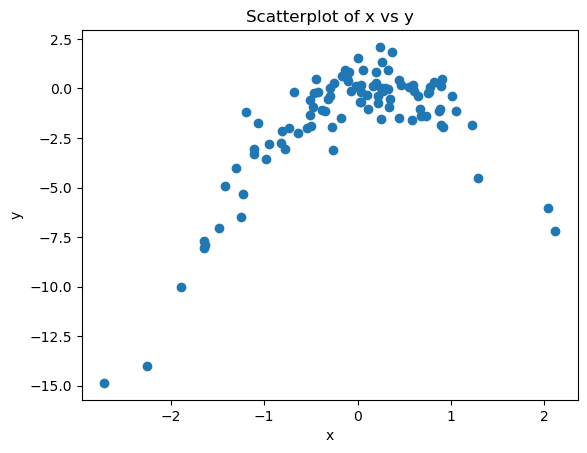

In [27]:
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatterplot of x vs y')
plt.show()

### c)

In [28]:
from sklearn.pipeline import make_pipeline
df = pd.DataFrame({'x': x, 'y': y})
loo = LeaveOneOut()

for degree in [1, 2, 3, 4]:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    scores = cross_val_score(model, df[['x']], df['y'], cv=loo, scoring='neg_mean_squared_error')
    mse = np.mean(np.abs(scores))
    
    print(f"Modelo {degree} (Polinomio grado {degree}): MSE = {mse:.5f}")

Modelo 1 (Polinomio grado 1): MSE = 6.63303
Modelo 2 (Polinomio grado 2): MSE = 1.12294
Modelo 3 (Polinomio grado 3): MSE = 1.30180
Modelo 4 (Polinomio grado 4): MSE = 1.33239


En base a estos resultados, el modelo con el menor MSE es el modelo de polinomio de grado 2, lo que sugiere que este modelo es el más adecuado para ajustar los datos generados.

### d)

In [ ]:
# Repeat (c) using another random seed, and report your results. Are your results the same as what you got in (c)? Why?
random = np.random.default_rng(2)
x_new = random.normal(size=100)
y_new = x_new - 2 * x_new**2 + random.normal(size=100)
plt.scatter(x_new, y_new)
plt.xlabel('x_new')
plt.ylabel('y_new')


### f)

In [29]:
for degree in [1, 2, 3, 4]:
    #Usando np.vander se crea la matriz de polinomios
    model = sm.OLS(y, sm.add_constant(np.vander(x, N=degree+1, increasing=True)))
    results = model.fit()
    print(f"Modelo {degree} (Polinomio grado {degree}):")
    print(results.summary())

Modelo 1 (Polinomio grado 1):
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     45.60
Date:                Fri, 28 Nov 2025   Prob (F-statistic):           1.04e-09
Time:                        19:11:55   Log-Likelihood:                -230.83
No. Observations:                 100   AIC:                             465.7
Df Residuals:                      98   BIC:                             470.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4650 

En base a todos estos modelos, vemos que, una vez más, el modelo de polinomio de grado 2 es el que mejor se ajusta a los datos sin sobreajustar, ya que tiene el MSE más bajo en el LOOCV y sus coeficientes son significativos. Los modelos de grado 3 y 4 no muestran mejoras significativas en el MSE y presentan signos de sobreajuste.

# 9)

We will now consider the Boston housing data set, from the ISLP library.
- (a) Based on this data set, provide an estimate for the population mean of medv. Call this estimate µˆ.
- (b) Provide an estimate of the standard error of µˆ. Interpret this result. Hint: We can compute the standard error of the sample mean by
dividing the sample standard deviation by the square root of the number of observations.
- (c) Now estimate the standard error of µˆ using the bootstrap. How does this compare to your answer from (b)?
- d) Based on your bootstrap estimate from (c), provide a 95 % confidence interval for the mean of medv. Compare it to the resultsobtained by using Boston['medv'].std() and the two standard error rule (3.9). Hint: You can approximate a 95 % confidence interval using the formula [ˆµ − 2SE(ˆµ), µˆ + 2SE(ˆµ)].
- (e) Based on this data set, provide an estimate, µˆmed, for the median value of medv in the population.
- (f) We now would like to estimate the standard error of µˆmed. Unfortunately, there is no simple formula for computing the standard error of the median. Instead, estimate the standard error of the median using the bootstrap. Comment on your findings.
- (g) Based on this data set, provide an estimate for the tenth percentile of medv in Boston census tracts. Call this quantity µˆ0.1. (You can use the np.percentile() function.) np. percentile() 
- (h) Use the bootstrap to estimate the standard error of µˆ0.1. Comment on your findings

In [30]:
boston = load_data('Boston')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


### a)

In [31]:
mu_gorro = np.mean(boston['medv'])
mu_gorro

22.532806324110677

### b)

In [32]:
SE_mu = np.std(boston['medv']) / np.sqrt(len(boston))
SE_mu

0.4084569346972867

### c)

In [33]:
# método de bootstrap
B = 1000
mu_bootstrap = np.array([])
for i in range(B):
    sample_indices = np.random.choice(len(boston), size=len(boston), replace=True)
    sample = boston.iloc[sample_indices]
    mu_b = np.mean(sample['medv'])
    mu_bootstrap = np.append(mu_bootstrap, mu_b)
mu_bootstrap_std = np.std(mu_bootstrap)
mu_bootstrap_std

0.3878060915746815

en comparación con el SE, vemos que el método del bootstrap da un resultado muy similar. La razón por la que estos valores se parecen se debe a que ambos métodos están estimando la variabilidad de la media muestral, aunque lo hacen de maneras diferentes. El SE se basa en supuestos teóricos sobre la distribución de la muestra, mientras que el bootstrap utiliza la re-muestreo empírico para estimar esta variabilidad.

### d)

In [34]:
print(f"Intervalo de confianza medv original: [{mu_gorro - 1.96*SE_mu:.2f}, {mu_gorro + 1.96*SE_mu:.2f}]")
print(f"Intervalo de confianza medv bootstrap: [{mu_gorro - 1.96*mu_bootstrap_std:.2f}, {mu_gorro + 1.96*mu_bootstrap_std:.2f}]")

Intervalo de confianza medv original: [21.73, 23.33]
Intervalo de confianza medv bootstrap: [21.77, 23.29]


son prácticamente lo mismo, a diferencia de unas décimas 

### e)

In [35]:
mediana_original = np.median(boston['medv'])
mediana_original

21.2

### f)

In [36]:
B = 1000
mediana_bootstrap = np.array([])
for i in range(B):
    sample_indices = np.random.choice(len(boston), size=len(boston), replace=True)
    sample = boston.iloc[sample_indices]
    mediana_b = np.median(sample['medv'])
    mediana_bootstrap = np.append(mediana_bootstrap, mediana_b)
mediana_bootstrap_std = np.std(mediana_bootstrap)
mediana_bootstrap_std

0.3720991500930897

la mediana del bootstrap confirma que hay una uena estimación ya que se parece mucho a la media original. Es importante notar que la mediana es una medida de tendencia central más robusta frente a valores atípicos en comparación con la media, lo que puede ser beneficioso en conjuntos de datos con distribuciones sesgadas o con outliers.

### g)

In [38]:
medv_percentil_10 = np.percentile(boston['medv'], 10)
medv_percentil_10

12.75

In [39]:
B = 1000
percentil_10_bootstrap = np.array([])
for i in range(B):
    sample_indices = np.random.choice(len(boston), size=len(boston), replace=True)
    sample = boston.iloc[sample_indices]
    percentil_10_b = np.percentile(sample['medv'], 10)
    percentil_10_bootstrap = np.append(percentil_10_bootstrap, percentil_10_b)
percentil_10_bootstrap_std = np.std(percentil_10_bootstrap)
percentil_10_bootstrap_std

0.49233778800738015

En conclusión, podemos observar que los errores estándar obtenidos mediante el método tradicional y el método bootstrap son bastante similares para la media de 'medv'. Esto indica que el método bootstrap es una herramienta confiable para estimar la variabilidad de la media en este caso específico.

profe, estaba muy larga la tarea :(